<a href="https://colab.research.google.com/github/terrysu64/Machine-Learning-and-Data-Science-Projects/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# neural network classification

In [2]:
from sklearn.datasets import make_circles

n = 1000
X,y = make_circles(n,
                   noise=0.03,
                   random_state=42)

X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [3]:
import pandas as pd

#visualize data
circles = pd.DataFrame({"x0":X[:,0], "x1":X[:,1], "label":y})
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


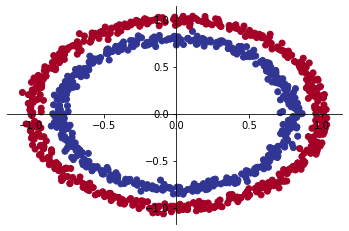

In [4]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu) #binary classification base on small or large circle

### steps in modelling

In [5]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 8s 5ms/step - loss: 0.7054 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7033 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7026 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7021 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7016 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7010 - accuracy: 0.4990
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7004 - accuracy: 0.5010
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7000 - accuracy: 0.4990
Epoch 11/

## improving the model

In [6]:
#plot predictions against original scatter plot

import numpy as np

def plot_decision(model, X, y):
  #define axis boundaries and make meshgrid: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in); y_pred = np.round(y_pred).reshape(xx.shape)

  plt.scatter(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(), yy.max())


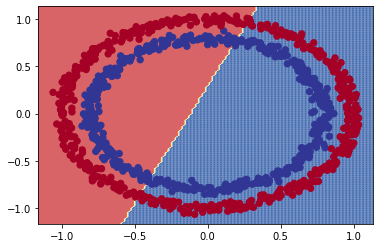

In [7]:
plot_decision(model,X,y) #the issue is that decision boundary isnt a linear equation

## non-linearity

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

history = model.fit(X,y,epochs=20)

In [9]:
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9810


[0.13530556857585907, 0.9810000061988831]

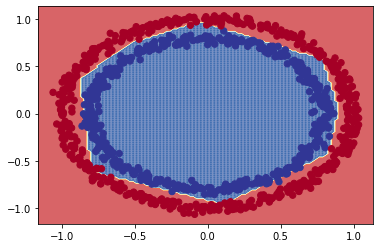

In [10]:
plot_decision(model,X,y)

### replicating sigmoid function

In [11]:
toy = tf.cast(tf.range(-10,10), tf.float32)
toy

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

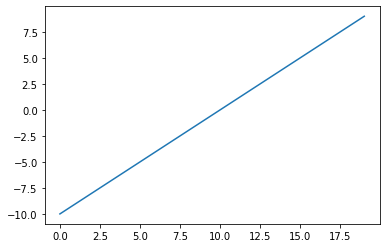

In [12]:
plt.plot(toy)

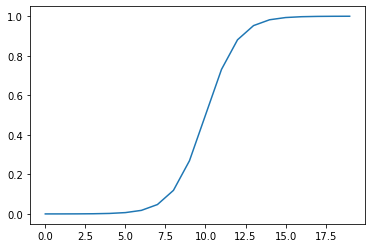

In [13]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

plt.plot(sigmoid(toy))

Text(0.5, 1.0, 'model loss curve')

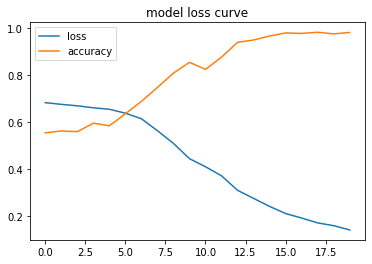

In [14]:
#visualize loss 
pd.DataFrame(history.history).plot()
plt.title("model loss curve")

## finding the ideal learning rate

In [ ]:
#using learning rate callback
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) #increasing lr every epoch

history = model.fit(X,y,epochs=100,
                    callbacks=[lr_scheduler])

Text(0.5, 1.0, 'model loss curve')

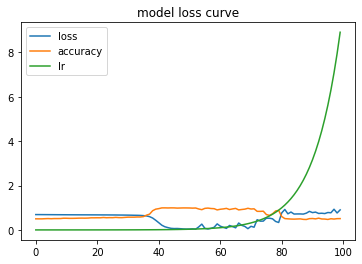

In [19]:
pd.DataFrame(history.history).plot()
plt.title("model loss curve")

In [21]:
#learning rate vs loss
lrs= 1e-4 * (10 ** (tf.range(100)/20))
lrs[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.0001    , 0.0001122 , 0.00012589, 0.00014125, 0.00015849])>

Text(0.5, 1.0, 'learning rate vs loss')

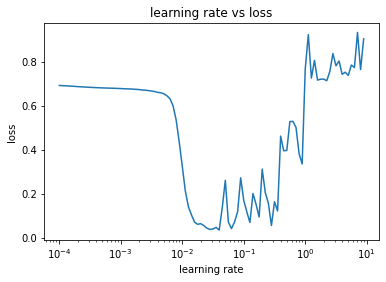

In [24]:
plt.semilogx(lrs, history.history["loss"])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

#ideal rate is global minimum / 10

In [ ]:
#implementing ideal learning rate
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

history = model.fit(X,y,epochs=20)

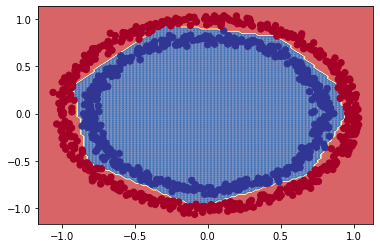

In [26]:
plot_decision(model,X,y)

## confusion matrix

In [28]:
y_preds = model.predict(X)
y_preds[:3] #needs reshaping + convert to binary

array([[0.9999862 ],
       [0.99914026],
       [0.9866889 ]], dtype=float32)

In [30]:
y_preds = tf.round(y_preds)
y_preds[:3]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_preds)

array([[496,   4],
       [  1, 499]])